## Лабораторная работа №2. Сысоев Александр РТ5-61Б

Задание:

    Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных.
    
    Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
        обработку пропусков в данных;
        кодирование категориальных признаков;
        масштабирование данных.


## Импорт библиотек, чтение датасета и вывод основных характеристик

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('houses_to_rent.csv', sep=",")

In [3]:
data['floor'] = data['floor'].replace('-', np.nan)
data = data.astype({'floor': float})
data = data.drop('Unnamed: 0', axis = 1)

In [4]:
data.shape

(6080, 13)

In [5]:
data.dtypes

city                int64
area                int64
rooms               int64
bathroom            int64
parking spaces      int64
floor             float64
animal             object
furniture          object
hoa                object
rent amount        object
property tax       object
fire insurance     object
total              object
dtype: object

Смотрим, в каких столбцах есть пропуски

In [6]:
data.isnull().sum()

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor             1555
animal               0
furniture            0
hoa                  0
rent amount          0
property tax         0
fire insurance       0
total                0
dtype: int64

In [7]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,NaN,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10.0,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3.0,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12.0,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,NaN,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


## Обработка пропусков

In [8]:
data_floor = data[['floor']]
data_floor.head()

,floor
0,NaN
1,10.0
2,3.0
3,12.0
4,NaN


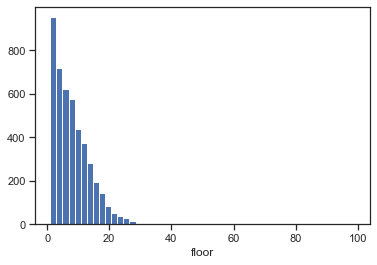

In [9]:
plt.hist(data_floor, 50)
plt.xlabel('floor')
plt.show()

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [11]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_floor)
mask_missing_values_only

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [12]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_floor)
    return data_num_imp[mask_missing_values_only]

In [17]:
data_num_imp = test_num_impute('median')
data_num_imp

array([6., 6., 6., ..., 6., 6., 6.])

## Преобразование категориальных признаков в числовые

In [27]:
data_temp = []
data_temp.append(data.columns[6])
data_temp.append(data.columns[7])
data_enc = data[data_temp]
data_enc

,animal,furniture
0,acept,furnished
1,acept,not furnished
2,acept,furnished
3,acept,not furnished
4,not acept,not furnished
...,...,...
6075,acept,not furnished
6076,not acept,furnished
6077,acept,not furnished
6078,not acept,not furnished


In [31]:
for col in data_enc.columns:
    print(data_enc[col].unique())

['acept' 'not acept']
['furnished' 'not furnished']


In [33]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [37]:
le = LabelEncoder()
data_enc_animal = le.fit_transform(data_enc['animal'])
data_enc_furniture = le.fit_transform(data_enc['furniture'])

In [39]:
data_enc_animal, data_enc_furniture

(array([0, 0, 0, ..., 0, 1, 0]), array([0, 1, 0, ..., 1, 1, 0]))

## Масштабирование данных

In [46]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['rooms']])
sc1_data

array([[0.22222222],
       [0.11111111],
       [0.44444444],
       ...,
       [0.        ],
       [0.22222222],
       [0.11111111]])

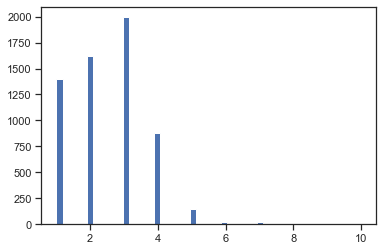

In [47]:
plt.hist(data['rooms'], 50)
plt.show()

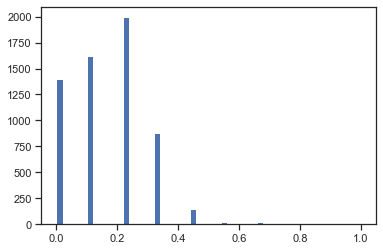

In [48]:
plt.hist(sc1_data, 50)
plt.show()